In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

In [2]:
%matplotlib inline
domain = 'N_B6'
DataPath = str('K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\華北次分區\\'+ (domain) + '\\')
NDataPath = unicode(DataPath,'utf8')

In [3]:
#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=3表示前四行略過
df = pd.read_excel(unicode(DataPath,'utf8') + (domain) + '_avg_std.xlsx')
#顯示前5行資料
df.head()

,Year,N_B6_avg_round,N_B6_count,avg_B6,std_B6,gradient_B6
0,1644,-3,4,-0.750000,1.500000,-0.750000
1,1645,-3,4,-0.750000,1.500000,0.000000
2,1646,3,4,0.750000,0.500000,1.500000
3,1647,0,1,0.000000,0.000000,-0.750000
4,1648,5,6,0.833333,0.752773,0.833333


In [4]:
x = df.iloc[:, 0] #Year
y = df.iloc[:, 3] #mean : avg_B5
e = df.iloc[:, 4] #standard deviation : std_B5

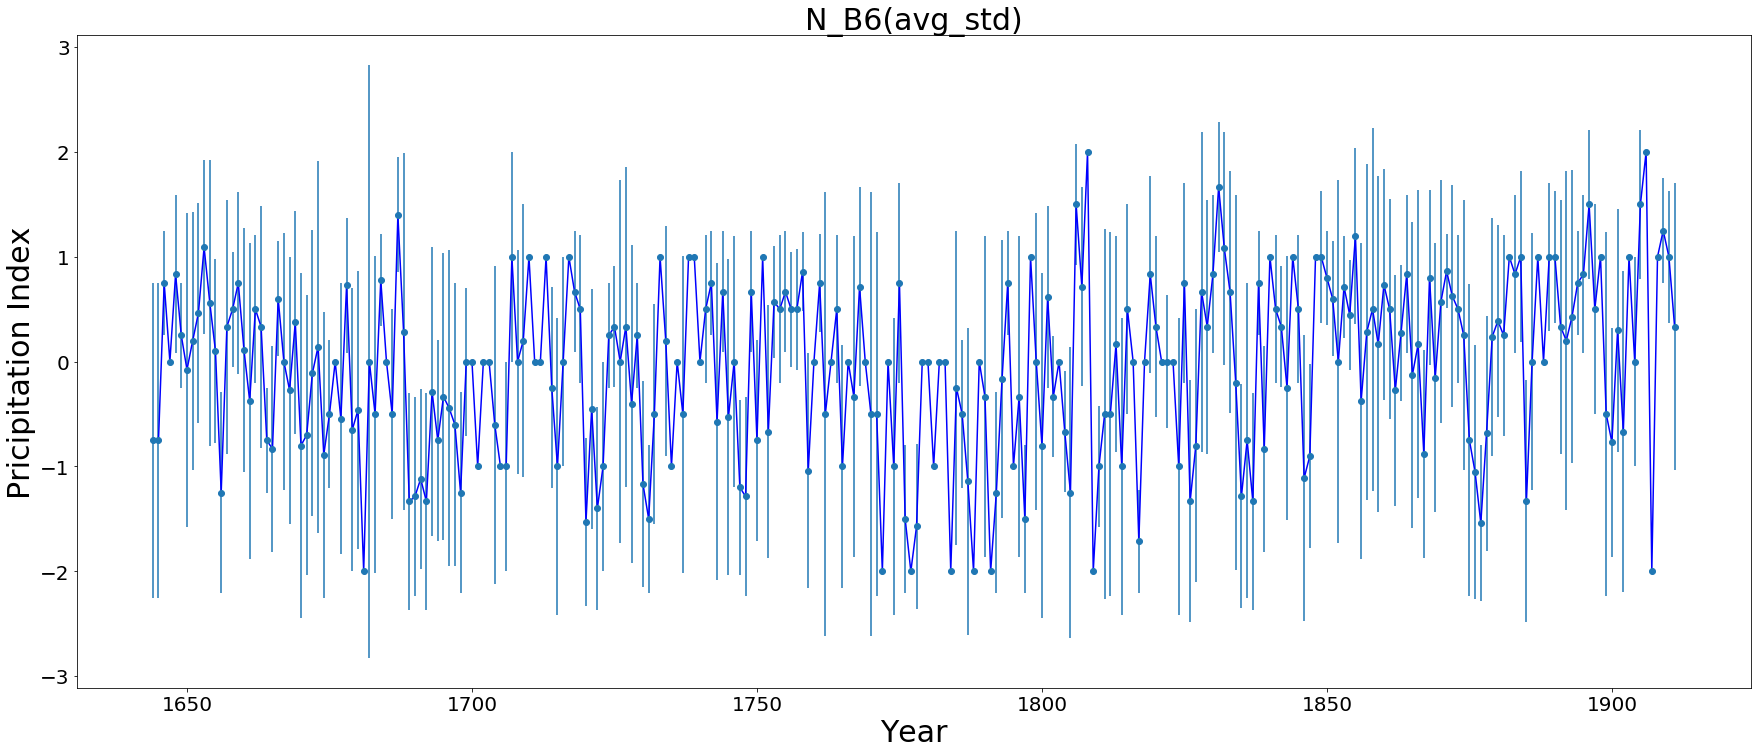

In [5]:
Fig_ts = plt.figure(figsize=(30,12))
plt.plot(x, y, c="blue")
plt.errorbar(x, y, e, linestyle='None', marker='o')
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title((domain)+"(avg_"+"std)", fontsize=30)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Pricipitation Index", fontsize=30)
plt.savefig(unicode(DataPath,'utf8') + (domain) +'_errorbarplot.jpg')

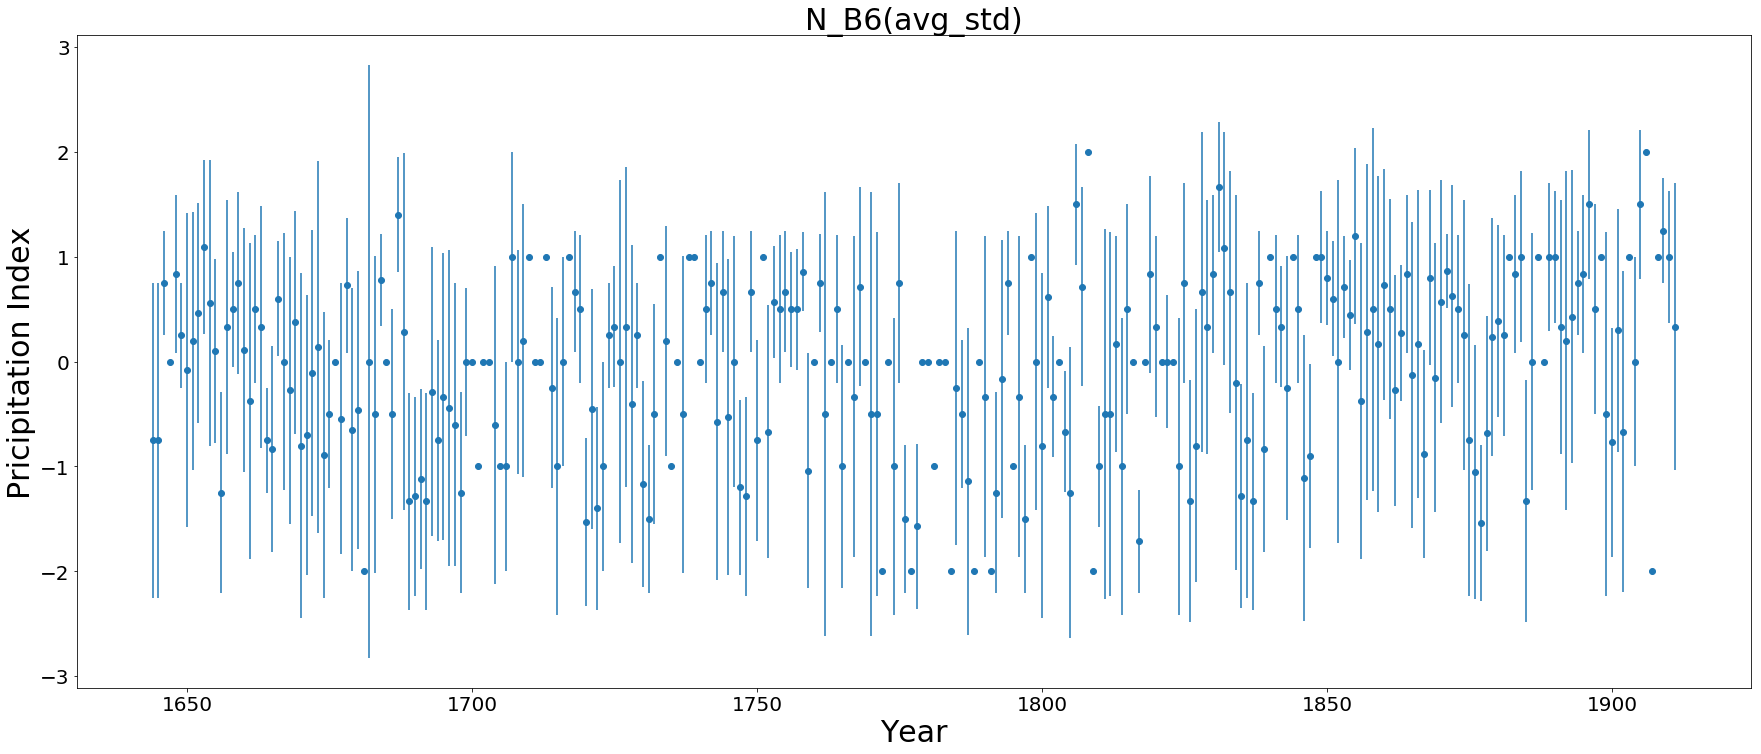

In [6]:
Fig_ts = plt.figure(figsize=(30,12))
#plt.plot(x, y, c="blue")
plt.errorbar(x, y, e, linestyle='None', marker='o')
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title((domain)+"(avg_"+"std)", fontsize=30)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Pricipitation Index", fontsize=30)
plt.savefig(unicode(DataPath,'utf8') + (domain) +'_errorbarplot2.jpg')

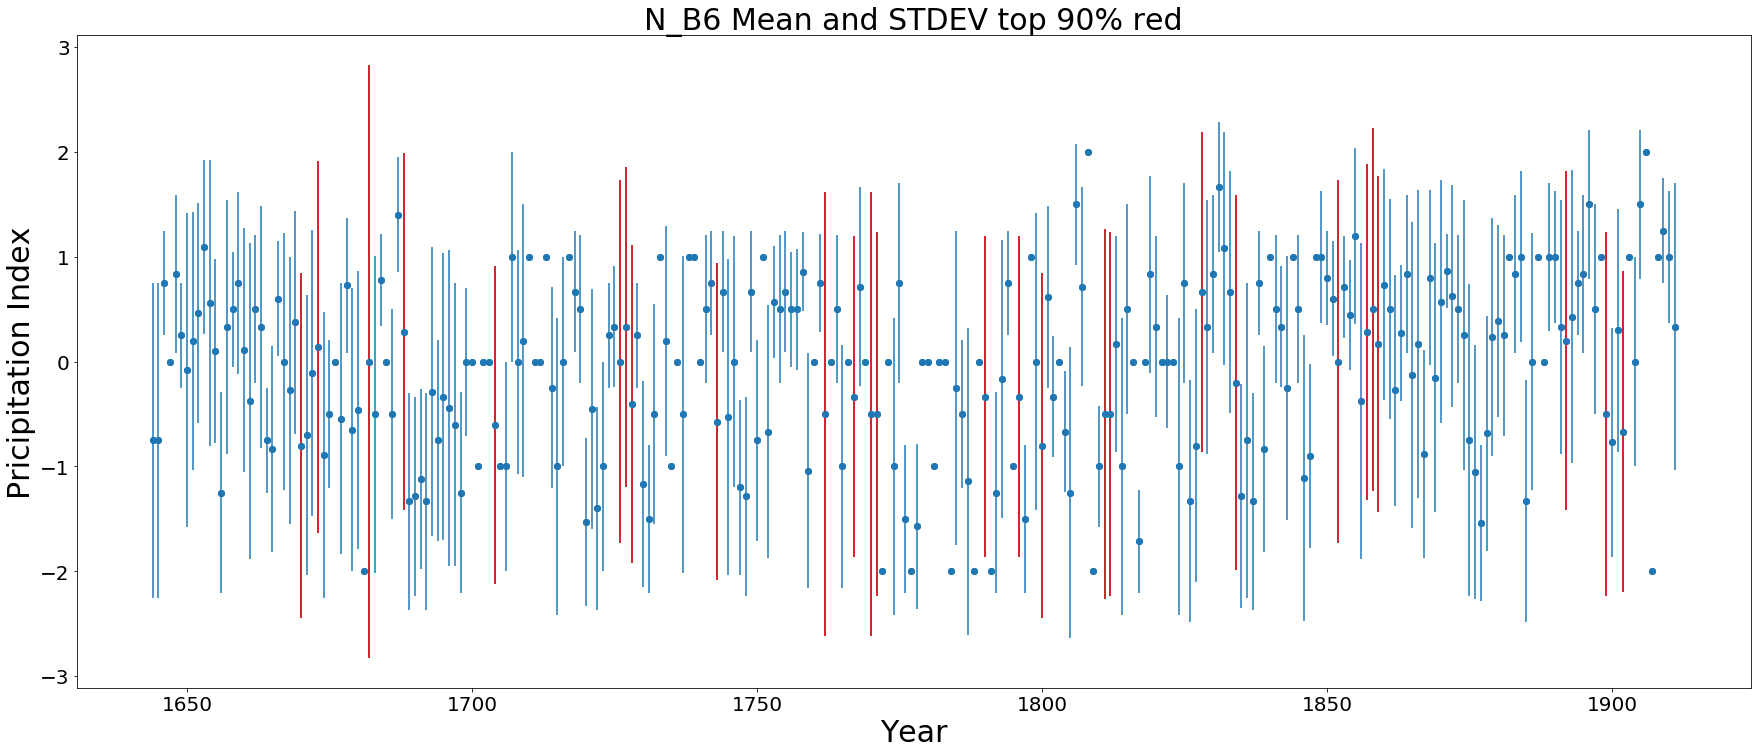

In [7]:
e2 = e.copy()
len(e2)
e3=[]
p90 = np.percentile(e,90)
for i in e2:
    #print i
    if i > p90:
        e3.append(i)
    else:
        e3.append(0)  
#print e3
Fig_ts = plt.figure(figsize=(30,12))
#plt.plot(x, y, c="b")

plt.errorbar(x, y, e, linestyle='None', marker='o')
plt.errorbar(x, y, e3, linestyle='None', marker='o', ecolor='Red')
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title((domain) + " Mean and STDEV top 90% red", fontsize=30)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Pricipitation Index", fontsize=30)
plt.savefig(unicode(DataPath,'utf8') + (domain) +'_errorbarplot_p90.jpg')

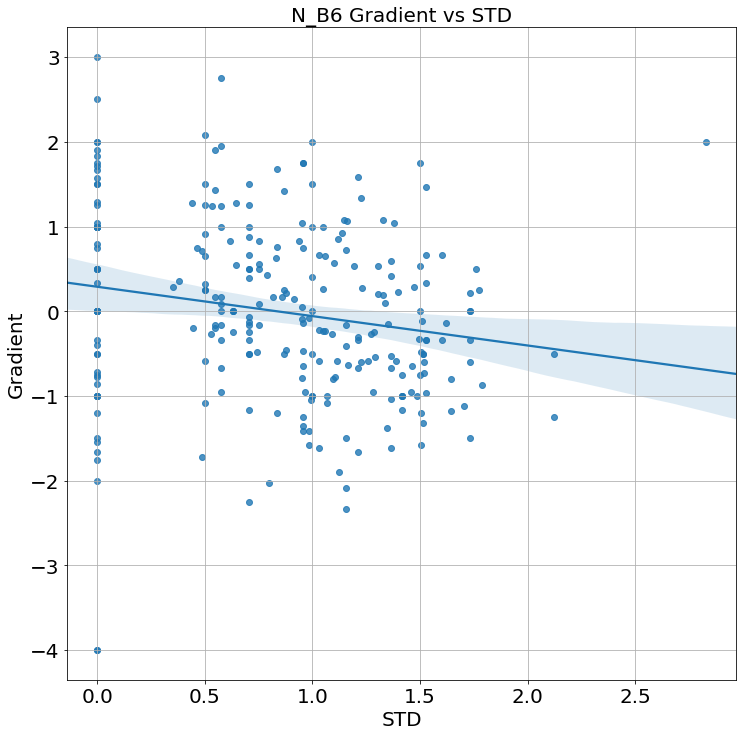

In [9]:
plt.figure(figsize=(12,12))
sns.regplot("std_B6", "gradient_B6", data=df)
#sns.lmplot("gradient_B4", "std_B4", data=df, size=5,aspect=2)
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title((domain) + " Gradient vs STD", fontsize=20)
plt.xlabel("STD", fontsize=20)
plt.ylabel("Gradient", fontsize=20)
plt.savefig(unicode(DataPath,'utf8') + (domain) +'regGplot.jpg')

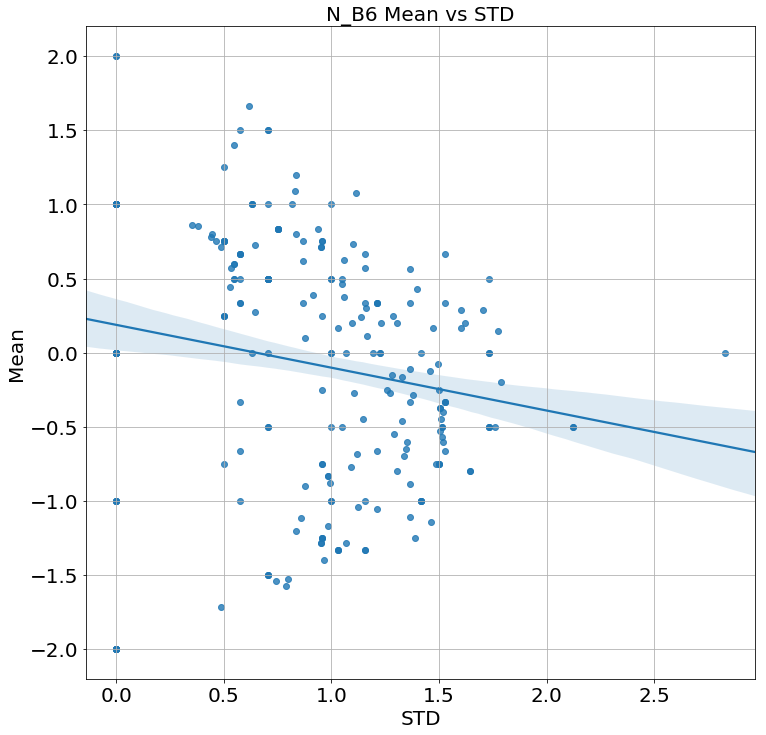

In [10]:
plt.figure(figsize=(12,12))
sns.regplot("std_B6", "avg_B6", data=df, order=1,ci = 90)
#sns.lmplot("gradient_B4", "std_B4", data=df, size=5,aspect=2)
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title((domain) + " Mean vs STD", fontsize=20)
plt.xlabel("STD", fontsize=20)
plt.ylabel("Mean", fontsize=20)
plt.savefig(unicode(DataPath,'utf8') + (domain) +'regMplot.jpg')